<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


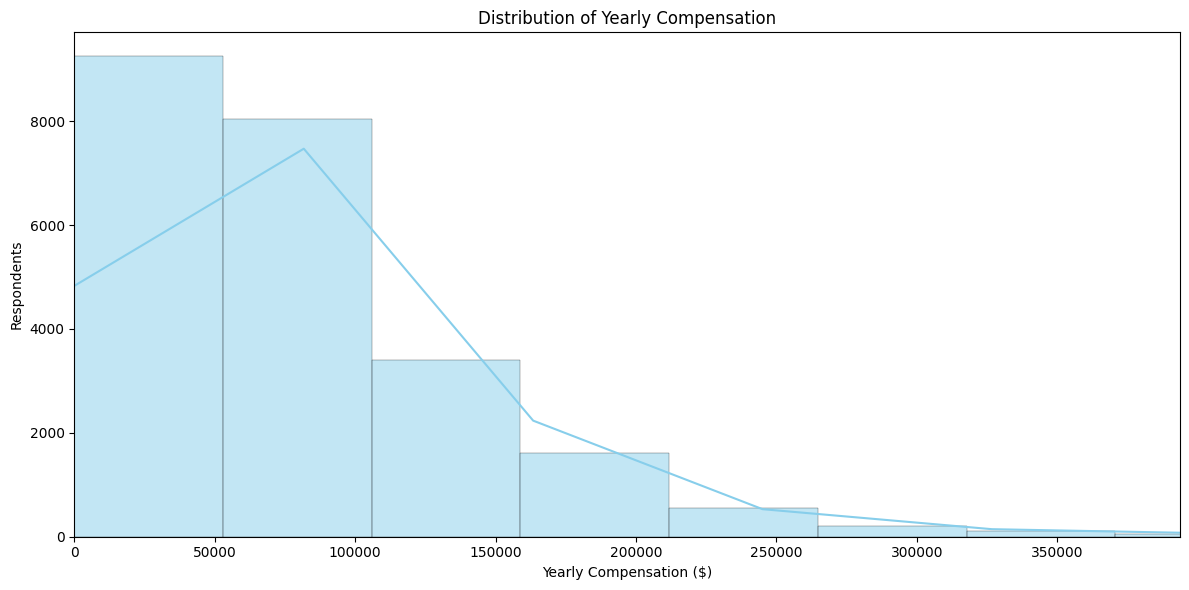

In [3]:
## Write your code here

# Set up the plot style
plt.figure(figsize=(12, 6))

# Create a histogram with KDE
sns.histplot(data=df, x='ConvertedCompYearly', kde=True, color='skyblue')

# Customize the plot
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation ($)')
plt.ylabel('Respondents')

# Limit x-axis to focus on the bulk of the data (e.g., up to 99th percentile)
upper_limit = df['ConvertedCompYearly'].quantile(0.99)
plt.xlim(0, upper_limit)

# Show the plot
plt.tight_layout()
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
## Write your code here

# Convert compensation to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Filter for full-time employed respondents
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Drop missing compensation values
full_time_df = full_time_df.dropna(subset=['ConvertedCompYearly'])

# Calculate the median
median_comp = full_time_df['ConvertedCompYearly'].median()

# Print the result
print(f"Median yearly compensation for full-time employed respondents: ${median_comp:,.2f}")

Median yearly compensation for full-time employed respondents: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



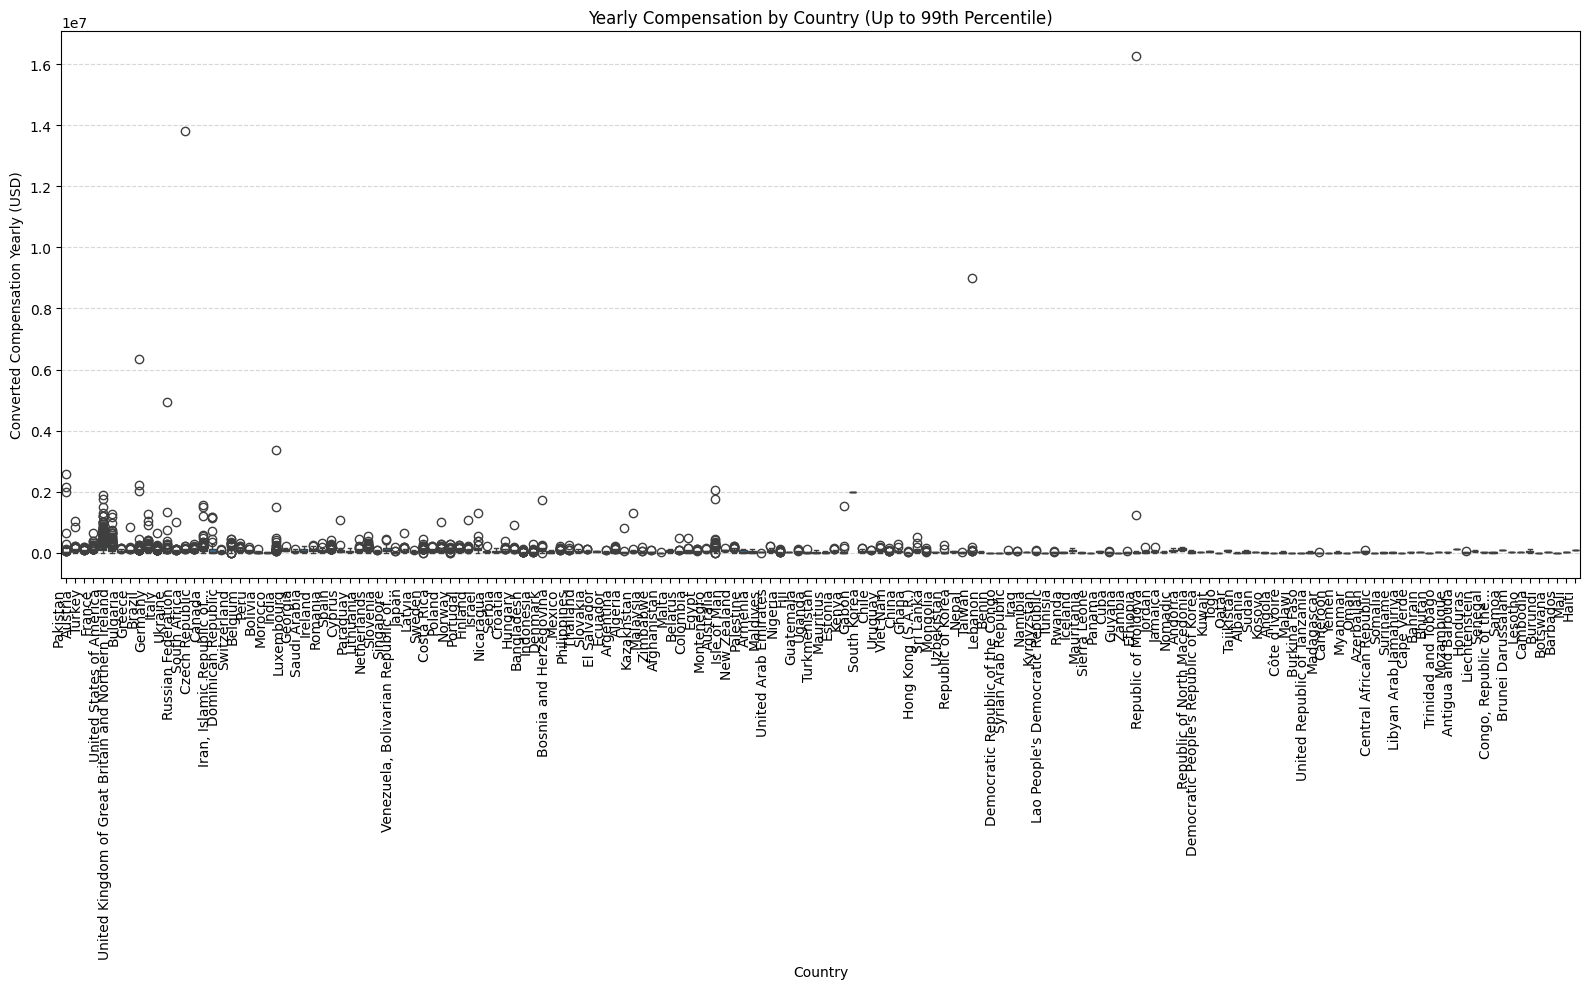

In [5]:
## Write your code here

# Ensure compensation is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop rows with missing compensation or country
df = df.dropna(subset=['ConvertedCompYearly', 'Country'])

# Plot boxplots
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='Country', y='ConvertedCompYearly')
plt.xticks(rotation=90, ha='right')
plt.title('Yearly Compensation by Country (Up to 99th Percentile)')
plt.xlabel('Country')
plt.ylabel('Converted Compensation Yearly (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
## Write your code here

# Ensure compensation column is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop missing values in the target column
df_clean = df.dropna(subset=['ConvertedCompYearly'])

# Calculate IQR
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds (no negative compensation)
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_refined = df_clean[
    (df_clean['ConvertedCompYearly'] >= lower_bound) &
    (df_clean['ConvertedCompYearly'] <= upper_bound)
]

# Print Summary Statistics
print(f"Q1: ${Q1:.2f}")
print(f"Q3: ${Q3:.2f}")
print(f"IQR: ${IQR:.2f}")
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")
print(f"Original non-null rows: {len(df_clean)}")
print(f"Rows after outlier removal: {len(df_refined)}")
print(f"Outliers removed: {len(df_clean) - len(df_refined)}")

#Show basic statistics
print("\nRefined Compensation Stats:")
print(df_refined['ConvertedCompYearly'].describe())

Q1: $32712.00
Q3: $107971.50
IQR: $75259.50
Lower bound: $0.00
Upper bound: $220860.75
Original non-null rows: 23435
Rows after outlier removal: 22457
Outliers removed: 978

Refined Compensation Stats:
count     22457.000000
mean      71347.201897
std       51271.396445
min           1.000000
25%       32000.000000
50%       63694.000000
75%      101281.000000
max      220207.000000
Name: ConvertedCompYearly, dtype: float64


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.153182        0.020156
WorkExp                         0.153182  1.000000       -0.028839
JobSatPoints_1                  0.020156 -0.028839        1.000000


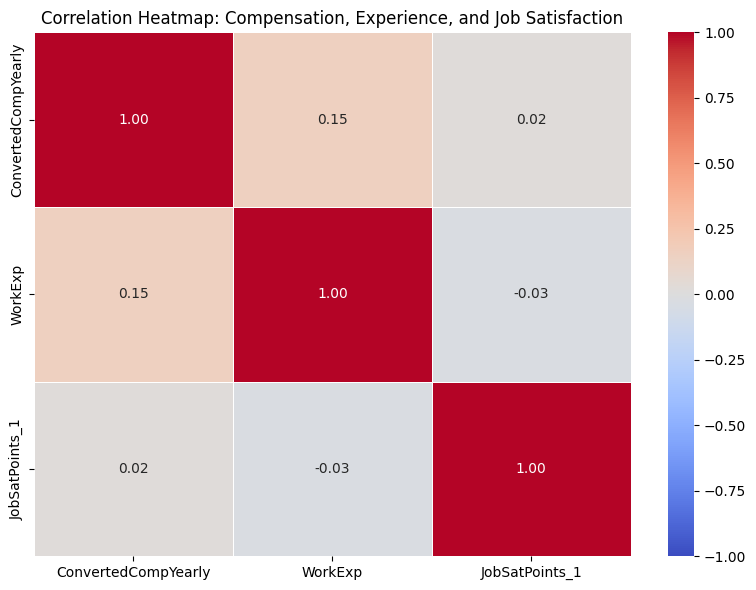

In [7]:
## Write your code here

# Convert relevant columns to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in any of the 3 columns
df_corr = df.dropna(subset=['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1'])

# Compute correlation matrix
corr_matrix = df_corr[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].corr()

# Print correlation values
print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap: Compensation, Experience, and Job Satisfaction')
plt.tight_layout()
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


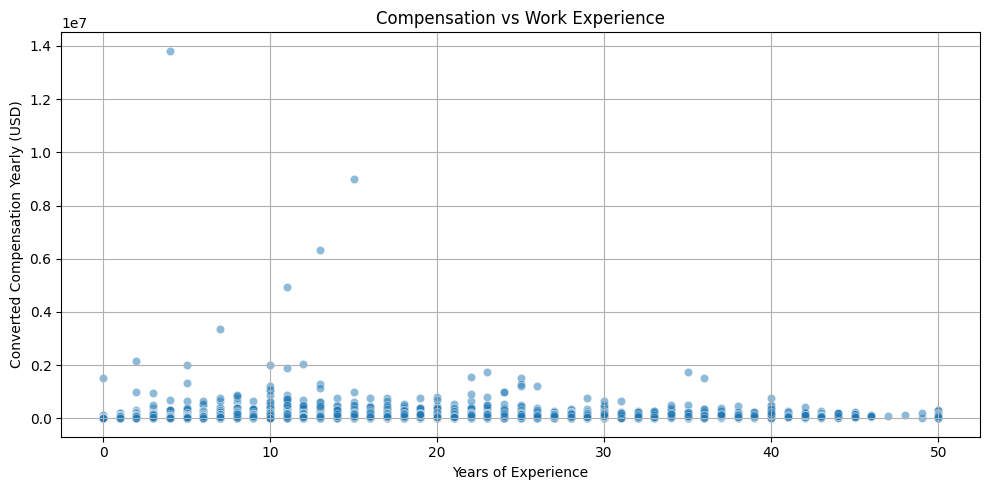

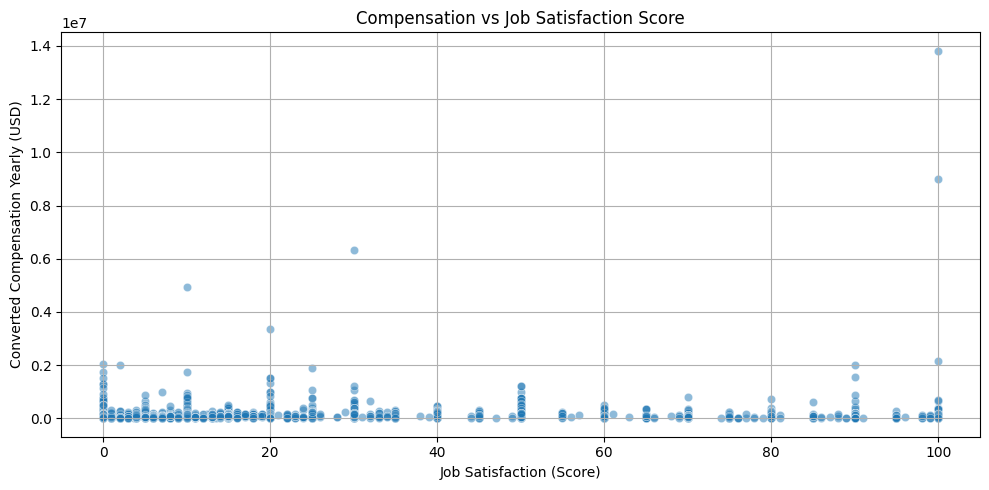

In [8]:
## Write your code here

# Convert columns to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in relevant columns
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1'])

# Plot 1: Compensation vs Work Experience
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_filtered, x='WorkExp', y='ConvertedCompYearly', alpha=0.5)
plt.title('Compensation vs Work Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Converted Compensation Yearly (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Compensation vs Job Satisfaction
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_filtered, x='JobSatPoints_1', y='ConvertedCompYearly', alpha=0.5)
plt.title('Compensation vs Job Satisfaction Score')
plt.xlabel('Job Satisfaction (Score)')
plt.ylabel('Converted Compensation Yearly (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


#### Copyright © IBM Corporation. All rights reserved.
